# Use `konrad` as radiation solver

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import typhon as ty

import konrad


konrad.enable_logging()

# Create an atmosphere component.
atmosphere = konrad.atmosphere.Atmosphere.from_netcdf(
    ncfile='./data/tropical-standard.nc',
)
# It is possible to explicitly set different species (e.g. CO2).
atmosphere['CO2'][:] = 348e-6

# Create a surface component (T and p of the lowest atmosphere level are interpolated).
surface = konrad.surface.SurfaceHeatCapacity.from_atmosphere(atmosphere, albedo=0.2)

# Create cloud component (here clear-sky).
cloud = konrad.cloud.ClearSky.from_atmosphere(atmosphere)

# Setup the RRTMG radiation component (choose zenith angle and solar constant).
rrtmg = konrad.radiation.RRTMG(zenith_angle=47.88)
rrtmg.calc_radiation(atmosphere, surface, cloud)  # Actual RT simulation

/home/mpim/m300580/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Plot radiative fluxes

Text(0.5,0,'Radiative flux [$\\sf W/m^2$]')

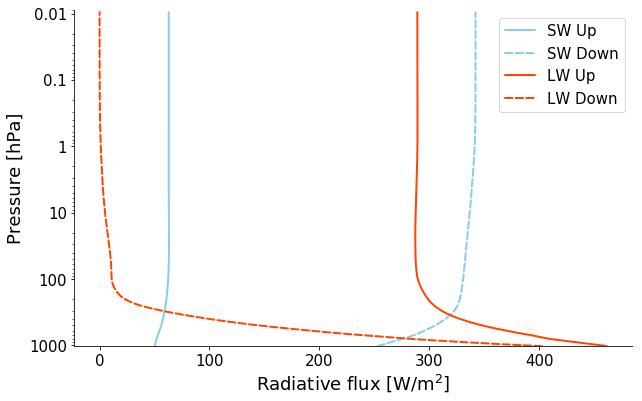

In [2]:
plt.style.use(ty.plots.styles('typhon'))
fig, ax = plt.subplots()
ty.plots.profile_p_log(atmosphere['phlev'], rrtmg['sw_flxu'][-1, :],
                       label='SW Up', color='skyblue', ls='solid')
ty.plots.profile_p_log(atmosphere['phlev'], rrtmg['sw_flxd'][-1, :],
                       label='SW Down', color='skyblue', ls='dashed')
ty.plots.profile_p_log(atmosphere['phlev'], rrtmg['lw_flxu'][-1, :],
                       label='LW Up', color='orangered', ls='solid')
ty.plots.profile_p_log(atmosphere['phlev'], rrtmg['lw_flxd'][-1, :],
                       label='LW Down', color='orangered', ls='dashed')
ax.legend(loc='upper right')
ax.set_xlabel('Radiative flux [$\sf W/m^2$]')

## Plot radiative heating

(-12, 12)

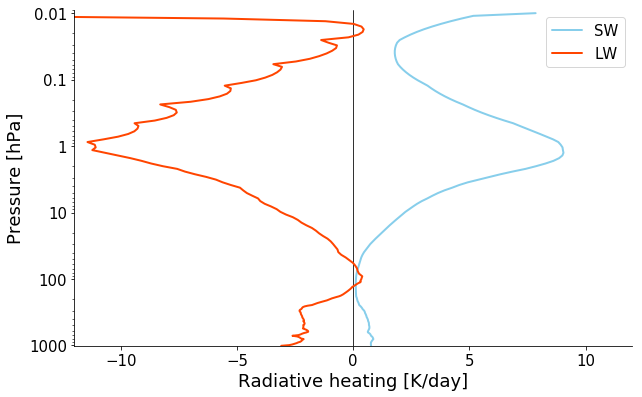

In [3]:
# Plot the calculated fluxes.
plt.style.use(ty.plots.styles('typhon'))
fig, ax = plt.subplots()
ax.axvline(0, color='black', linewidth=0.8)
ty.plots.profile_p_log(atmosphere['plev'], rrtmg['sw_htngrt'][-1, :],
                       label='SW', color='skyblue')
ty.plots.profile_p_log(atmosphere['plev'], rrtmg['lw_htngrt'][-1, :],
                       label='LW', color='orangered')
ax.legend(loc='upper right')
ax.set_xlabel('Radiative heating [K/day]')
ax.set_xlim(-12, 12)